# One Asset

<a href="#Read-CSV-File">Read CSV File</a>

<a href="#Change-Index">Change Index</a>

<a href="#Read-Specific-Columns-of-CSV-File">Read Specific Columns of CSV File</a>

<a href="#Change-Column-Name">Change Column Name</a>

<a href="#Read-Specific-Rows-of-CSV-File">Read Specific Rows of CSV File</a>

<a href="#Plot-Adj-Close">Plot Adj Close</a>

<a href="#Plot-Adj-Close-with-Volume">Plot Adj Close with Volume</a>

<a href="#Plot-Adj-Close-with-Volume-and-Moving-Average">Plot Adj Close with Volume and Moving Average</a>

<a href="#Plot-Adj-Close-with-Volume,-Moving-Average,-and-Rolling-Volatility">Plot Adj Close with Volume, Moving Average, and Rolling Volatility</a>

<a href="#Plot-Candlestick-Chart">Plot Candlestick Chart</a>

<a href="#Save-Figure">Save Figure</a>

<a href="#Compute-Daily-Return">Compute Daily Return</a>

<a href="#Compute-Basic-Statistics-of-Daily-Return">Compute Basic Statistics of Daily Return</a>

<a href="#Plot-Daily-Return">Plot Daily Return</a>

<a href="#Compute-Annualized-Expected-Return">Compute Annualized Expected Return</a>

<a href="#Compute-Annualized-Volatility">Compute Annualized Volatility</a>


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read CSV, TSV, EXCEL File

> `pd.read_csv` - 콤마 세퍼레이티드 파일 CSV 읽기  

> `pd.read_table` - 텝 세퍼레이티드 파일 TSV 읽기 

> `pd.read_excel` - 엑샐 파일 읽기 

[CSV](https://en.wikipedia.org/wiki/Comma-separated_values)는 
파일을 작성하는 양식의 일종인데, 
각각의 줄에 담는 데이타를 콤마를 기준으로 나누는 양식이다. 
CSV 양식으로 작성한 파일을 CSV 파일이라고 하는데,
판다스에서는 CSV 파일을 읽어 데이파프레임으로 전환하는 함수가 있다.
이 함수가 `pd.read_csv`이다. 

[TSV](https://en.wikipedia.org/wiki/Tab-separated_values)는 
파일을 작성하는 양식의 일종인데, 
각각의 줄에 담는 데이타를 텝 기준으로 나누는 양식이다. 
TSV 양식으로 작성한 파일을 TSV 파일이라고 하는데,
판다스에서는 TSV 파일을 읽어 데이파프레임으로 전환하는 함수가 있다.
이 함수가 `pd.read_table`이다. 

`pd.read_csv`과 `pd.read_table`은 기본적으로 같은 기능을 수행하는데, 읽고자 하는 파일이 콤마를 기준으로 데이타를 정렬했는지 아니면 텝을 기준으로 데이타를 정렬했는지 차이만 있다. 

`sep` 키워드를 이용하면, `pd.read_csv`를 이용 TSV 파일을 읽을 수 있고 반대로 `pd.read_table`을 이용 CSV 파일을 읽을 수 있다.

In [3]:
df = pd.read_csv("../data/sp500/WMT.csv")
df

FileNotFoundError: [Errno 2] File ../data/sp500/WMT.csv does not exist: '../data/sp500/WMT.csv'

In [1]:
import pandas as pd

if 1:
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
    # sep : str, default ‘,’
    df = pd.read_csv("./data/dow30/WMT.CSV")
elif 1:
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html
    # sep : str, default ‘\t’ (tab-stop)
    df = pd.read_table("../data/finance/dow30/WMT.CSV", sep=",")

print(df.head())

         Date      Open      High       Low     Close  Adj Close   Volume
0  1972-08-25  0.063477  0.064697  0.063477  0.064453   0.039309  2508800
1  1972-08-28  0.064453  0.064941  0.064209  0.064209   0.039160   972800
2  1972-08-29  0.063965  0.063965  0.063477  0.063477   0.038714  1945600
3  1972-08-30  0.063477  0.063477  0.062988  0.063477   0.038714   409600
4  1972-08-31  0.062988  0.062988  0.062500  0.062500   0.038118   870400


[pandas.read_csv 도큐먼트](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

[pandas.read_table 도큐먼트](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html)

[pandas.read_excel 도큐먼트](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html)

[<a href="#One-Asset">Back to top</a>]

# Change Index

> `index_col`  - 키워드

> `set_index`  - 메쏘드

`pd.read_csv`로 CSV 파일을 읽으니, 인덱스가 `Date`가 아니군요.

In [4]:
df = pd.read_csv("../data/finance/dow30/WMT.CSV")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.039309,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.039160,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.038714,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.038714,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.038118,870400


key word `index_col`을 이용, 
데이타를 읽어들일 때 인덱스가 `Date`가 되도록 코드를 수정해 보죠.

In [5]:
df = pd.read_csv("../data/finance/dow30/WMT.CSV", index_col="Date")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-08-25,0.063477,0.064697,0.063477,0.064453,0.039309,2508800
1972-08-28,0.064453,0.064941,0.064209,0.064209,0.039160,972800
1972-08-29,0.063965,0.063965,0.063477,0.063477,0.038714,1945600
1972-08-30,0.063477,0.063477,0.062988,0.063477,0.038714,409600
1972-08-31,0.062988,0.062988,0.062500,0.062500,0.038118,870400


`set_index` method를 이용, 
데이타를 읽어들인 후 인덱스가 `Date`가 되도록 코드를 수정해 보죠.

In [6]:
df = pd.read_csv("../data/finance/dow30/WMT.CSV").set_index("Date")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1972-08-25,0.063477,0.064697,0.063477,0.064453,0.039309,2508800
1972-08-28,0.064453,0.064941,0.064209,0.064209,0.039160,972800
1972-08-29,0.063965,0.063965,0.063477,0.063477,0.038714,1945600
1972-08-30,0.063477,0.063477,0.062988,0.063477,0.038714,409600
1972-08-31,0.062988,0.062988,0.062500,0.062500,0.038118,870400


[<a href="#One-Asset">Back to top</a>]

# Read Specific Columns of CSV File

> `usecols` - 키워드

In [7]:
df = pd.read_csv("../data/finance/dow30/WMT.CSV", 
                 index_col='Date', 
                 usecols=['Date', 'Adj Close', 'Volume']) 
df.head()

,Adj Close,Volume
Date,,
1972-08-25,0.039309,2508800
1972-08-28,0.039160,972800
1972-08-29,0.038714,1945600
1972-08-30,0.038714,409600
1972-08-31,0.038118,870400


[<a href="#One-Asset">Back to top</a>]

# Change Column Name

> rename - 메쏘드 

> columns - 어트리뷰트 

In [8]:
df = pd.read_csv("../data/finance/dow30/WMT.CSV", 
                 index_col='Date', 
                 usecols=['Date', 'Adj Close', 'Volume']).rename(
    columns={'Adj Close': 'WMT', 'Volume': 'WMT_Volume'}) 
df.head()

,WMT,WMT_Volume
Date,,
1972-08-25,0.039309,2508800
1972-08-28,0.039160,972800
1972-08-29,0.038714,1945600
1972-08-30,0.038714,409600
1972-08-31,0.038118,870400


In [9]:
df = pd.read_csv("../data/finance/dow30/WMT.CSV", 
                 index_col='Date', 
                 usecols=['Date', 'Adj Close', 'Volume'])
df.columns = ['WMT', 'WMT_Volume']
df.head()

,WMT,WMT_Volume
Date,,
1972-08-25,0.039309,2508800
1972-08-28,0.039160,972800
1972-08-29,0.038714,1945600
1972-08-30,0.038714,409600
1972-08-31,0.038118,870400


[<a href="#One-Asset">Back to top</a>]

# Read Specific Rows of CSV File

`pd.date_range`를 이용, 특정 기간동안의 데이트타임인덱스를 만들자.

In [10]:
start = "2010-01-01"
end   = "2017-12-31"
dates = pd.date_range(start, end)
dates

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=2922, freq='D')

특정 기간동안의 데이트타임인덱스를 이용, 이 기간 동안의 엠프티 데이타프레임을 만들자.

In [11]:
df = pd.DataFrame(index=dates)
df.head()

""
2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-05


관심가는 데이타를 읽어들이자.

In [12]:
df_temp = pd.read_csv("../data/finance/dow30/WMT.CSV",
                      index_col="Date",
                      parse_dates=True,
                      usecols=['Date', 'Adj Close', 'Volume'],
                      na_values=["null"]).rename(
    columns={'Adj Close': 'WMT', 'Volume': 'WMT_Volume'})
df_temp.head()

,WMT,WMT_Volume
Date,,
1972-08-25,0.039309,2508800
1972-08-28,0.039160,972800
1972-08-29,0.038714,1945600
1972-08-30,0.038714,409600
1972-08-31,0.038118,870400


특정 기간 동안의 엠프티 데이타프레임과 읽어들인 데이타를 합치자.

In [13]:
df = df.join(df_temp)
df.head()

,WMT,WMT_Volume
2010-01-01,NaN,NaN
2010-01-02,NaN,NaN
2010-01-03,NaN,NaN
2010-01-04,44.191208,20753100.0
2010-01-05,43.751175,15648400.0


NaN을 제거하자.

In [14]:
df = df.dropna()
df.head()

,WMT,WMT_Volume
2010-01-04,44.191208,20753100.0
2010-01-05,43.751175,15648400.0
2010-01-06,43.653385,12517200.0
2010-01-07,43.677837,10662700.0
2010-01-08,43.457809,11363200.0


[<a href="#One-Asset">Back to top</a>]

# Plot Adj Close

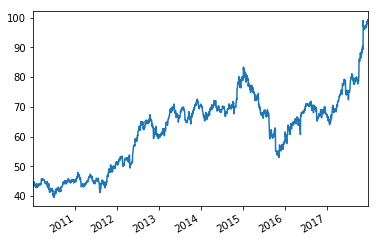

In [15]:
df["WMT"].plot()

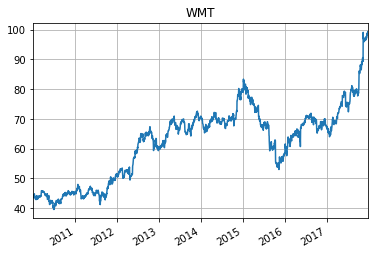

In [16]:
df["WMT"].plot(title='WMT', fontsize=10, grid=True)

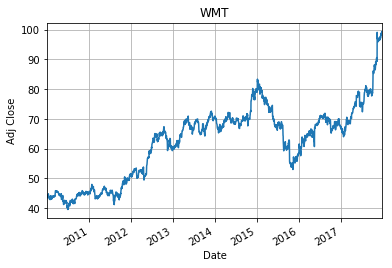

In [17]:
fig = plt.figure()
ax = plt.axes()
ax = df['WMT'].plot(title='WMT', fontsize=10, grid=True)
ax.set_xlabel("Date")
ax.set_ylabel("Adj Close") 

날짜를 기울여 볼까요.

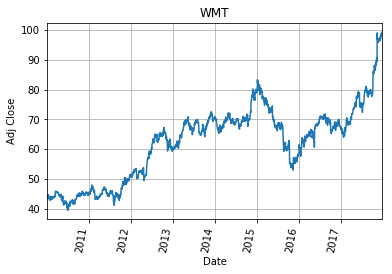

In [18]:
fig = plt.figure()
ax = plt.axes()
ax = df['WMT'].plot(title='WMT', fontsize=10, grid=True)
ax.set_xlabel("Date")
ax.set_ylabel("Adj Close") 
for tick in ax.get_xticklabels():
    tick.set_rotation(80)

[<a href="#One-Asset">Back to top</a>]

# Plot Adj Close with Volume

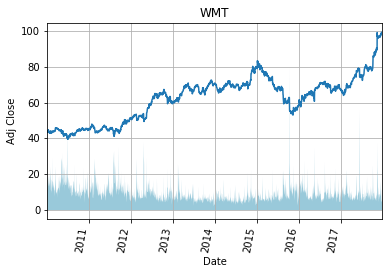

In [19]:
fig = plt.figure()
ax = plt.axes()
ax = df['WMT'].plot(title='WMT', fontsize=10, grid=True)
ax.fill_between(df.index, 0, (1e-6)*df['WMT_Volume'], facecolor='#0079a3', alpha=0.4)
ax.set_xlabel("Date")
ax.set_ylabel("Adj Close") 
for tick in ax.get_xticklabels():
    tick.set_rotation(80)

[<a href="#One-Asset">Back to top</a>]

# Plot Adj Close with Volume and Moving Average

In [20]:
df['rolling_mean_252'] = df['WMT'].rolling(window=252).mean() 

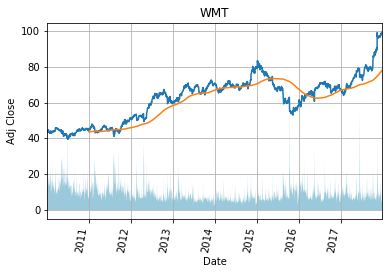

In [21]:
fig = plt.figure()
ax = plt.axes()
ax = df['WMT'].plot(title='WMT', fontsize=10, grid=True)
ax = df['rolling_mean_252'].plot(title='WMT', fontsize=10, grid=True) 
ax.fill_between(df.index, 0, (1e-6)*df['WMT_Volume'], facecolor='#0079a3', alpha=0.4)
ax.set_xlabel("Date")
ax.set_ylabel("Adj Close") 
for tick in ax.get_xticklabels():
    tick.set_rotation(80)

[<a href="#One-Asset">Back to top</a>]

# Plot Adj Close with Volume, Moving Average, and Rolling Volatility

In [22]:
df['log_return'] = np.log(df.WMT/df.WMT.shift(1))
df['rolling_vol_252'] = df.log_return.rolling(window=252, center=False).std() * np.sqrt(252)

[]

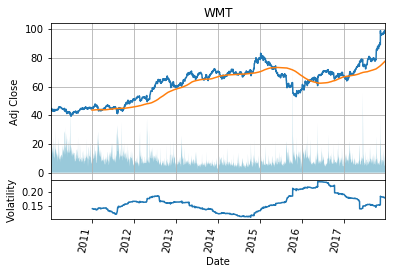

In [23]:
fig = plt.figure()
grid = plt.GridSpec(5, 1, hspace=0.0, wspace=0.0)
ax1 = fig.add_subplot(grid[:-1, 0])
ax1 = df['WMT'].plot(title='WMT', fontsize=10, grid=True)
ax1 = df['rolling_mean_252'].plot(title='WMT', fontsize=10, grid=True) 
ax1.fill_between(df.index, 0, (1e-6)*df['WMT_Volume'], facecolor='#0079a3', alpha=0.4)

ax1.set_ylabel("Adj Close") 
    
ax2 = fig.add_subplot(grid[-1, 0])
ax2 = df['rolling_vol_252'].plot() 

ax2.set_xlabel("Date")
ax2.set_ylabel("Volatility") 
for tick in ax2.get_xticklabels():
    tick.set_rotation(80)

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

[<a href="#One-Asset">Back to top</a>]

# Plot Candlestick Chart

In [24]:
start = "2017-01-01"
end   = "2017-01-31"
dates = pd.date_range(start, end)
df = pd.DataFrame(index=dates)

df_temp = pd.read_csv("../data/finance/dow30/WMT.CSV",
                      index_col="Date",
                      parse_dates=True,
                      na_values=["null"])

df = df.join(df_temp)
df = df.dropna()

df.head()

,Open,High,Low,Close,Adj Close,Volume
2017-01-03,69.239998,69.239998,68.050003,68.660004,66.929802,10473200.0
2017-01-04,68.660004,69.629997,68.599998,69.059998,67.319717,7918000.0
2017-01-05,68.430000,69.330002,68.120003,69.209999,67.465942,7099200.0
2017-01-06,68.410004,68.500000,68.010002,68.260002,66.539886,9491100.0
2017-01-09,68.330002,68.800003,68.320000,68.709999,66.978539,8660600.0


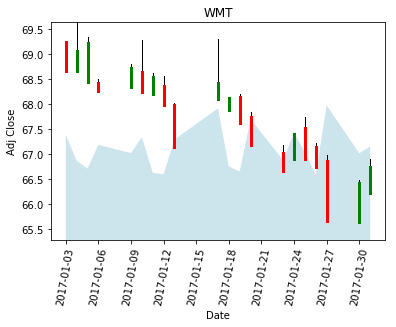

In [25]:
fig = plt.figure()
ax = plt.axes()

for i in df.index:
    if df.Close[i] > df.Open[i]:
        pcolor = 'g'
        bottom = df.Open[i]
        top    = df.Close[i] 
    else:
        pcolor = 'r'
        bottom = df.Close[i] 
        top    = df.Open[i]
    high = df.High[i]
    low  = df.Low[i]
    ax.plot([i, i], [bottom, top], color='k',    linewidth=1)
    ax.plot([i, i], [top,   high], color='k',    linewidth=1)
    ax.plot([i, i], [bottom, top], color=pcolor, linewidth=3)
    
ymin = df.Low.describe()[3] 
ymax = df.High.describe()[7] 
ax.set_ylim(ymin, ymax)   
ax.fill_between(df.index, 0, ymin+(2e-7)*df.Volume, facecolor='#0079a3', alpha=0.2)

ax.set_title("WMT")
ax.set_xlabel("Date")
ax.set_ylabel("Adj Close")
for tick in ax.get_xticklabels():
    tick.set_rotation(80)

[<a href="#One-Asset">Back to top</a>]

# Save Figure

In [26]:
if not os.path.exists("img"):
    os.mkdir("img")

In [27]:
plt.savefig('img/WMT.png') 

[<a href="#One-Asset">Back to top</a>]

# Compute Daily Return

판다스 메쏘드를 써서 Daily Return을 계산해 볼까요. 

In [28]:
start = "2010-01-01"
end   = "2017-12-31"
dates = pd.date_range(start, end)

df = pd.DataFrame(index=dates)

df_temp = pd.read_csv("../data/finance/dow30/WMT.CSV",
                      index_col="Date",
                      parse_dates=True,
                      na_values=["null"])

df = df.join(df_temp)

df = df.dropna()

df.head()

,Open,High,Low,Close,Adj Close,Volume
2010-01-04,53.740002,54.669998,53.669998,54.230000,44.191208,20753100.0
2010-01-05,54.090000,54.189999,53.570000,53.689999,43.751175,15648400.0
2010-01-06,53.500000,53.830002,53.419998,53.570000,43.653385,12517200.0
2010-01-07,53.720001,53.750000,53.259998,53.599998,43.677837,10662700.0
2010-01-08,53.430000,53.529999,53.020000,53.330002,43.457809,11363200.0


In [29]:
df_daily_return = df["Adj Close"].pct_change()
df_daily_return.head()

2010-01-04         NaN
2010-01-05   -0.009957
2010-01-06   -0.002235
2010-01-07    0.000560
2010-01-08   -0.005038
Name: Adj Close, dtype: float64

직접 Daily Return을 계산해 볼까요. 

In [30]:
def compute_daily_return(df_adj_close):
    return (df_adj_close / df_adj_close.shift(1)) - 1 

In [31]:
df_daily_return = compute_daily_return(df["Adj Close"])

In [32]:
df["Adj Close"].head()

2010-01-04    44.191208
2010-01-05    43.751175
2010-01-06    43.653385
2010-01-07    43.677837
2010-01-08    43.457809
Name: Adj Close, dtype: float64

In [33]:
df_daily_return.head()

2010-01-04         NaN
2010-01-05   -0.009957
2010-01-06   -0.002235
2010-01-07    0.000560
2010-01-08   -0.005038
Name: Adj Close, dtype: float64

[<a href="#One-Asset">Back to top</a>]

# Compute Basic Statistics of Daily Return

In [34]:
mean_daily_return = df_daily_return.mean()
mean_daily_return

0.0004540663197316554

In [35]:
std_daily_return = df_daily_return.std()
std_daily_return

0.01043662561539986

In [36]:
df_daily_return.describe()

count    2012.000000
mean        0.000454
std         0.010437
min        -0.100405
25%        -0.004832
50%         0.000576
75%         0.005715
max         0.108984
Name: Adj Close, dtype: float64

In [37]:
count, mean, std, min_daily_return, Q1, Q2, Q3, max_daily_return = df_daily_return.describe()
Q2

0.0005759426826695835

[<a href="#One-Asset">Back to top</a>]

# Plot Daily Return

데일리 리턴을 시간의 함수로 그려보죠.

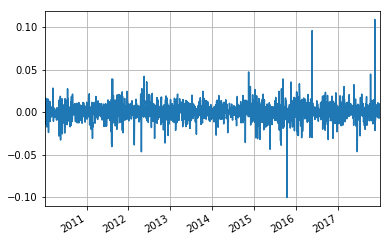

In [38]:
df_daily_return.plot()
plt.grid()

전날 리턴과 오늘 리턴과 관계가 있을까요?

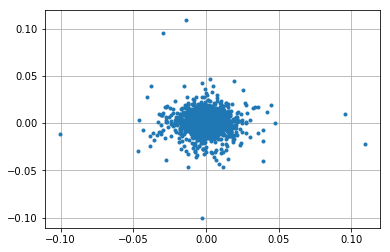

In [39]:
x = df_daily_return.iloc[:-1]
y = df_daily_return.iloc[1:]
plt.plot(x, y, '.')
plt.grid()

데일리 리턴의 히스토그램을 그려보죠.

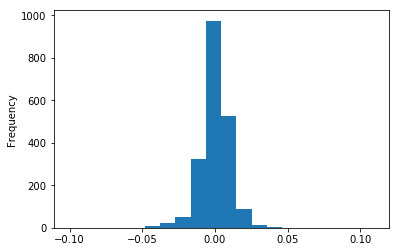

In [40]:
df_daily_return.plot(kind="hist", bins=20)

[<a href="#One-Asset">Back to top</a>]

# Compute Annualized Expected Return

In [41]:
def compute_expected_return(df_daily_return):
    return 252 * df_daily_return.mean() 

In [42]:
df_mu = compute_expected_return(df_daily_return)
df_mu

0.11442471257237717

[<a href="#One-Asset">Back to top</a>]

# Compute Annualized Volatility

In [43]:
def compute_volatility(df_daily_return):
    return np.sqrt(252) * df_daily_return.std()

In [44]:
df_vol = compute_volatility(df_daily_return)
df_vol

0.16567629543020682

[<a href="#One-Asset">Back to top</a>]